# Introduction to Computer Vision

# OpenCV

* Popular computer vision library
    * Used in industry and academy
* Started in 1999, popularized in 2000s
* Developed in efficient C/C++ code
* Stable Python interface since 2009
* Java interface and Android Programming

As the backend is in C/C++, it is very efficient

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot') # Just to style our plots

In [2]:
cap = cv2.VideoCapture(0) # Open your webcam. cap is short for capture
val, image = cap.read()
cap.release() # Close your webcam

### 1.1) The OpenCV way of displaying images

In [3]:
cv2.namedWindow("Smile!", 0)
cv2.imshow("Smile!", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 1.2) The IPython+Matplotlib way of showing images

First, define a function so that we can display our image as is, without styling by ggplot

In [4]:
def removeGrid():
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])

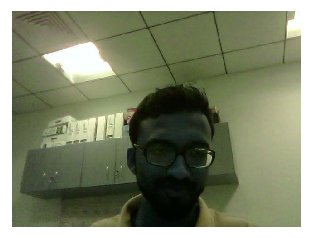

In [5]:
removeGrid()
plt.imshow(image)

#### *My reds are blue and my blues are red :O*

Don't worry. That's just because OpenCV stores images as BGR, whereas matplotlib and most of the scientific community accept the RGB standard. So now we have to figure out how to change this. First, find the dimensions of the image

In [6]:
print(image.shape)

(480, 640, 3)


Notice the third number is **3**, the number of channels. We want to reverse that while displaying. To make it convenient, simply create a function as a proxy

In [7]:
def dispImage(img):
    plt.imshow(img[:,:,::-1])

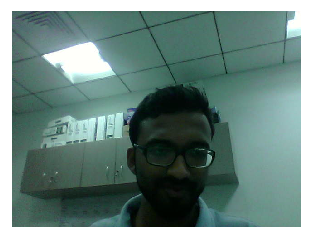

In [8]:
removeGrid()
dispImage(image)

## 2) What is an image under the hood in Python?

In [9]:
print(type(image))

<class 'numpy.ndarray'>


* In C++, OpenCV employs its Mat matrix structure
* But in Python, OpenCV represents images as NumPy n-dimensional arrays

## 3) Basic Image Properties

For almost all the commonly use functions in image processing, we can do it either using numpy functions or the opencv functions. Let's try some basic operations

### 3.1) Histograms

Let's try plotting the histogram of the above image. First, compute the histogram using numpy and OpenCV Separately

In [10]:
#Compute histograms using Numpy
h = [np.histogram(image[:,:,0],255)[0]] # Red Channel
h.append(np.histogram(image[:,:,1],255)[0]) # Green Channel
h.append(np.histogram(image[:,:,2],255)[0]) # Blue Channel

# Note that the order is Red --> Green --> Blue and not the other way around, because we flipped it at the top

#Now compute using OpenCV
opencv_h=[]
opencv_h.append(cv2.calcHist([image], [0], None, [256],[0, 256]))
opencv_h.append(cv2.calcHist([image], [1], None, [256],[0, 256]))
opencv_h.append(cv2.calcHist([image], [2], None, [256],[0, 256]))


Now compare the two

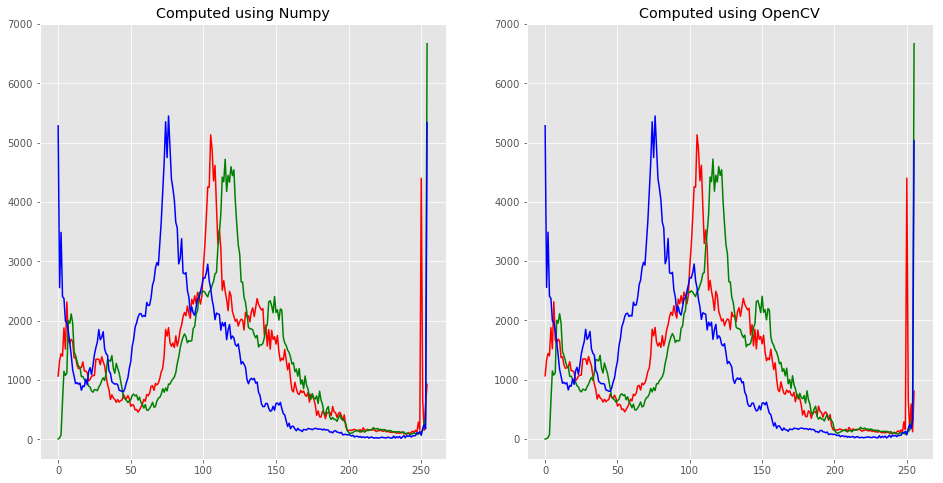

In [11]:
fig = plt.figure(figsize=(16,8))
colors = ['red', 'green', 'blue']

#Give titles to the plots
plt.subplot(121)
plt.title('Computed using Numpy')
plt.subplot(122)
plt.title('Computed using OpenCV')

#Do the actual plotting
for i in range(3):
    plt.subplot(121)
    plt.plot(h[i], color=colors[i])
    plt.subplot(122)
    plt.plot(opencv_h[i], color=colors[i])

### 3.1.1) SpeedTest
OpenCV claims that its histogram function is more faster than (around 40X) than np.histogram() in their website. So stick with OpenCV function.Let's put that to the test, shall we

In [12]:
import time
#Compute histograms using Numpy
t1 = time.time()
h = [np.histogram(image[:,:,0],255)[0]] # Blue Channel
h.append(np.histogram(image[:,:,1],255)[0]) # Green Channel
h.append(np.histogram(image[:,:,2],255)[0]) # Red Channel
t2=time.time()

#Now compute using OpenCV
opencv_h=[]
opencv_h.append(cv2.calcHist([image], [0], None, [256],[0, 256]))
opencv_h.append(cv2.calcHist([image], [1], None, [256],[0, 256]))
opencv_h.append(cv2.calcHist([image], [2], None, [256],[0, 256]))
t3 = time.time()

print('OpenCV took {:} seconds, while Numpy took {:} seconds\nThe ratio of the times taken is {:}'.format(t3-t2, t2-t1, (t2-t1)/(t3-t2)))

OpenCV took 0.0018601417541503906 seconds, while Numpy took 0.0371549129486084 seconds
The ratio of the times taken is 19.974237375032043


Okay so the claim may be off, but OpenCV's function is a whole lot faster. There's a much more robust way to time it in Jupyter, but we will leave that for you to explore

### 3.2) Brightening an Image

In [13]:
image2=(image+50)
h2, _=np.histogram(image2[:,:,0],255)

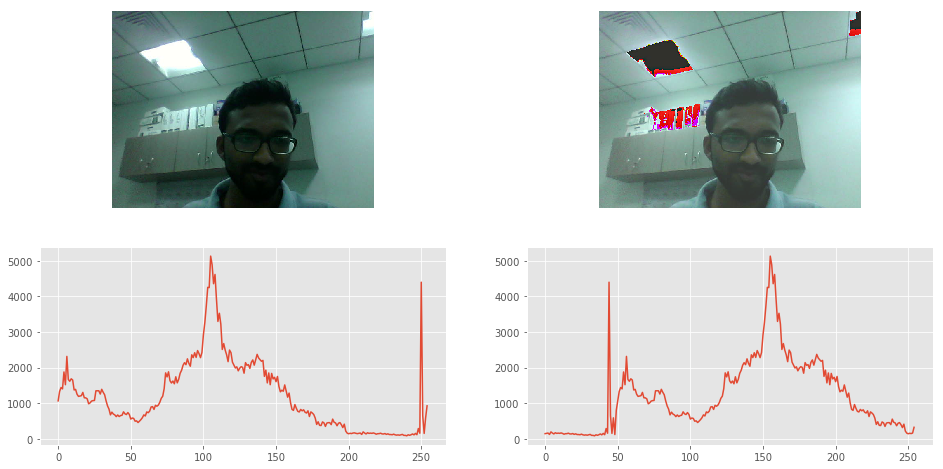

In [14]:
plt.figure(figsize=(16,8))
plt.subplot(221)
dispImage(image)
removeGrid()
plt.subplot(222)
dispImage(image2)
removeGrid()
plt.style.use('ggplot')
plt.subplot(223)
plt.plot(h[0])
plt.subplot(224)
plt.plot(h2)

So I got the brightness up, but the random spots are due to overflow How do I fix that? Simple. Make sure there's no overflow

In [15]:
image2 = image.copy()
image2[image2 >= 255-50]=255
image2[image2!=255] +=50
_, h2=np.histogram(image2[:,:,0],255)

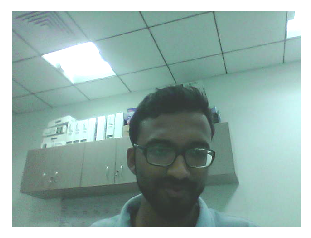

In [16]:
removeGrid()
dispImage(image2)

### 3.3) Negative Image

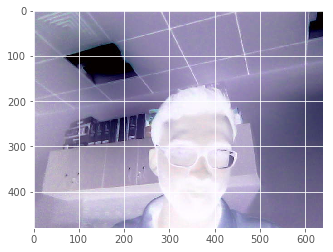

In [17]:
image2 = np.max(image) - image
dispImage(image2[:,:,::-1])

In [18]:
import os
cv2.imwrite(os.path.join("Elements","myimage.png"), image)

True